In [2]:
import pandas as pd
from io import StringIO

In [18]:
import codecs
import csv
reader = csv.reader(codecs.open('20210316AL.DAT', 'rU', 'utf-8'))
for row in reader:
    print(row)
    break
   

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [1]:
d = '44271.000740740739000000400Acked 5RNA://$Global/Blackrock/RSViewSE                                                B01ALM\OP_TAH_1111B                                                                                                                                                                                                                                                    0.00000000001        0.00000000000                     0ORO\PLANT                             3/16/2021   12:01:04 Acked Tag B01ALM\OP_TAH_1111B                                                                                  HMI-TEST       ORO\PLANT'

In [6]:
print(d.replace("         ", " "))

44271.000740740739000000400Acked 5RNA://$Global/Blackrock/RSViewSE        B01ALM\OP_TAH_1111B                            0.00000000001        0.00000000000     0ORO\PLANT     3/16/2021   12:01:04 Acked Tag B01ALM\OP_TAH_1111B          HMI-TEST       ORO\PLANT


In [7]:
import string
print(d.translate({ord(c): None for c in string.whitespace}))
f = d.translate({ord(c): None for c in string.whitespace}) 


44271.000740740739000000400Acked5RNA://$Global/Blackrock/RSViewSEB01ALM\OP_TAH_1111B0.000000000010.000000000000ORO\PLANT3/16/202112:01:04AckedTagB01ALM\OP_TAH_1111BHMI-TESTORO\PLANT


In [8]:
print(type(f))

<class 'str'>


In [24]:
print(len('44271.000740740739000000'))

24


In [38]:
print(f[0:24],f[24:27],f[27:32], f[32:33], f[33:33+len('RNA://$Global/Blackrock/RSViewSE')],\
     f[33+len('RNA://$Global/Blackrock/RSViewSE'):33+len('RNA://$Global/Blackrock/RSViewSE')+len()])

44271.000740740739000000 400 Acked 5 RNA://$Global/Blackrock/RSViewSE


In [ ]:
[ f[i:i+chunk_size] for i in [] ]

In [42]:
splitspaces = "                                                |\
                                                                                                               |\
        |                     |                             |   | | |\
                                                                                  |       "

In [52]:
p = '44271.001805555556000000512OutAl 2RNA://$Global/Blackrock/RSViewSE                                                B01ALM\OP_PDAH_2072                                                                                                                                                                                                                                                    0.00000000001        0.00000000000NORMAL               0NT AUTHORITY\SYSTEM                   3/16/2021   12:02:36 OutAl Tag B01ALM\OP_PDAH_2072                      NORMAL                                                      HMI-TEST       NT AUTHORITY\SYSTEM'

In [81]:
import re
p = '44271.002500000002000000546InAlm 1RNA://$Global/Blackrock/RSViewSE                                                B01ALM\OP_PDAH_2072                                                                                                                                                                                                                                                    1.00000000001        0.00000000000ALARM                3NT AUTHORITY\SYSTEM                   3/16/2021   12:03:36 InAlm Tag B01ALM\OP_PDAH_2072                      ON                         ALARM                            HMI-TEST       NT AUTHORITY\SYSTEM'
m = re.split(r'\s{3,}', p)
print(m)
# print(p.split(r'\s{5,}'))

['44271.002500000002000000546InAlm 1RNA://$Global/Blackrock/RSViewSE', 'B01ALM\\OP_PDAH_2072', '1.00000000001', '0.00000000000ALARM', '3NT AUTHORITY\\SYSTEM', '3/16/2021', '12:03:36 InAlm Tag B01ALM\\OP_PDAH_2072', 'ON', 'ALARM', 'HMI-TEST', 'NT AUTHORITY\\SYSTEM']


In [82]:
print(
m[0][0:24],m[0][24:27],m[0][27:32], m[0][32:34], m[0][34:34+len('RNA://$Global/Blackrock/RSViewSE')])

44271.002500000002000000 546 InAlm  1 RNA://$Global/Blackrock/RSViewSE


In [95]:
m[4][1:] 

'NT AUTHORITY\\SYSTEM'

In [97]:
print(m[1],m[2][:-1],m[2][-1], m[3][:13], m[3][13:],m[4][0:1],m[4][1:], ' '.join(m[5:-2]),m[-2],m[-1])

B01ALM\OP_PDAH_2072 1.0000000000 1 0.00000000000 ALARM 3 NT AUTHORITY\SYSTEM 3/16/2021 12:03:36 InAlm Tag B01ALM\OP_PDAH_2072 ON ALARM HMI-TEST NT AUTHORITY\SYSTEM


In [ ]:
s = '44271.000740740739000000 400 Acked 5 RNA://$Global/Blackrock/RSViewSE B01ALM\OP_TAH_1111B                                                                                                                                                                                                                                                    0.00000000001        0.00000000000                     0ORO\PLANT                             3/16/2021   12:01:04 Acked Tag B01ALM\OP_TAH_1111B                                                                                  HMI-TEST       ORO\PLANT'

In [21]:
df=pd.read_fwf('20210316AL.DAT',encoding = 3)

In [22]:
df.head(5)

,"y>  !j                    TimeStmp   F                 MilliTime  N                  TransType  C                   AlarmType  N""                  SrcArea    C#   P               TagName    Cs   ÿ               TagValue   Fr  ",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20847,Unnamed: 20848,Unnamed: 20849,Unnamed: 20850,Unnamed: 20851,Unnamed: 20852,Unnamed: 20853,Unnamed: 20854,Unnamed: 20855,Unnamed: 20856
0,              TagType    N†                 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,              ThreshNum  N›                 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44271.000740740739000000400Acked 5RNA://$Globa...,1.000000e-11,0.0,0ORO\PLANT,3/16/2021,12:01:04,Acked,Tag,B01ALM\OP_TAH_1111B,HMI-TEST,...,0.0,0ORO\PLANT,3/16/2021,11:55:02,Acked,Tag,B01ALM\OP_PDAH_2061,HMI-TEST,ORO\PLANT,


In [48]:
df1 = df['Unnamed: 0'].str.split('\s{2,}',expand=True)

                                               0                    1      \
0                                                NaN                  NaN   
1   44271.000740740739000000400Acked 5RNA://$Glob...  B01ALM\OP_TAH_1111B   

           2              3           4          5      \
0            NaN            NaN         NaN        NaN   
1  0.00000000001  0.00000000000  0ORO\PLANT  3/16/2021   

                                    6         7          8      \
0                                     NaN       NaN        NaN   
1  12:01:04 Acked Tag B01ALM\OP_TAH_1111B  HMI-TEST  ORO\PLANT   

                                               9      ...  \
0                                                NaN  ...   
1  44271.000740740739000000400Acked 5RNA://$Globa...  ...   

                                               14493                14494  \
0                                                NaN                  NaN   
1  44271.996550925927000000304Acked 5RNA://$Globa...  B0

In [49]:
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,14493,14494,14495,14496,14497,14498,14499,14500,14501,14502
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44271.000740740739000000400Acked 5RNA://$Glob...,B01ALM\OP_TAH_1111B,0.00000000001,0.00000000000,0ORO\PLANT,3/16/2021,12:01:04 Acked Tag B01ALM\OP_TAH_1111B,HMI-TEST,ORO\PLANT,44271.000740740739000000400Acked 5RNA://$Globa...,...,44271.996550925927000000304Acked 5RNA://$Globa...,B01ALM\OP_PDAH_2061,0.00000000001,0.00000000000,0ORO\PLANT,3/16/2021,11:55:02 Acked Tag B01ALM\OP_PDAH_2061,HMI-TEST,ORO\PLANT,


In [14]:
k = df.loc[1:1].values[0][0]

In [15]:
print(k.split('                                                                                                                                                                                                                                             '))

[' 44271.000740740739000000400Acked 5RNA://$Global/Blackrock/RSViewSE                                                B01ALM\\OP_TAH_1111B', '       0.00000000001        0.00000000000                     0ORO\\PLANT                             3/16/2021   12:01:04 Acked Tag B01ALM\\OP_TAH_1111B                                                                                  HMI-TEST       ORO\\PLANT', '          44271.000740740739000000400Acked 5RNA://$Global/Blackrock/RSViewSE                                                B01ALM\\OP_PDAH_2072', '       0.00000000001        0.00000000000                     0ORO\\PLANT                             3/16/2021   12:01:04 Acked Tag B01ALM\\OP_PDAH_2072                                                                                  HMI-TEST       ORO\\PLANT', '          44271.001805555556000000512OutAl 2RNA://$Global/Blackrock/RSViewSE                                                B01ALM\\OP_PDAH_2072', '       0.00000000001        0.00000

In [32]:
o = ' 44271.000740740739000000400Acked 5RNA://$Global/Blackrock/RSViewSE                                                B01ALM\\OP_TAH_1111B                                                                                                                                                                                                                                                    0.00000000001        0.00000000000                     0ORO\\PLANT                             3/16/2021   12:01:04 Acked Tag B01ALM\\OP_TAH_1111B                                                                                  HMI-TEST       ORO\\PLANT'

[' 44271.000740740739000000400Acked 5RNA://$Global/Blackrock/RSViewSE                                                B01ALM\\OP_TAH_1111B                                                                                                                                                                                                                                                    0.00000000001        0.00000000000                     0ORO\\PLANT                             3/16/2021   12:01:04 Acked Tag B01ALM\\OP_TAH_1111B                                                                                  HMI-TEST       ORO\\PLANT']


In [12]:
import csv
with open('file.dat', 'r',encoding='utf-16') as fin:
    for line in fin:
        newline = map(str.strip, line.split('|'))
        if len(newline) == 6 and newline[3] and newline[4]:
            csv.writer(fout).writerow(newline)

FileNotFoundError: [Errno 2] No such file or directory: 'file.dat'

In [3]:
data = pd.read_fwf('20210316AL.DAT', colspecs='infer')

In [10]:
df = pd.read_table('20210316AL.DAT')

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [5]:
df.head(10)

,"y>  !j                    TimeStmp   F                 MilliTime  N                  TransType  C                   AlarmType  N""                  SrcArea    C#   P               TagName    Cs   �               TagValue   Fr  ",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20847,Unnamed: 20848,Unnamed: 20849,Unnamed: 20850,Unnamed: 20851,Unnamed: 20852,Unnamed: 20853,Unnamed: 20854,Unnamed: 20855,Unnamed: 20856
0,              TagType    N�                 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,              ThreshNum  N�                 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44271.000740740739000000400Acked 5RNA://$Globa...,1.000000e-11,0.0,0ORO\PLANT,3/16/2021,12:01:04,Acked,Tag,B01ALM\OP_TAH_1111B,HMI-TEST,...,0.0,0ORO\PLANT,3/16/2021,11:55:02,Acked,Tag,B01ALM\OP_PDAH_2061,HMI-TEST,ORO\PLANT,


In [1]:
! pip install tensorflow
! pip install keras


In [2]:
import os
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.compat.v1.logging.set_verbosity(tf.logging.ERROR)

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from keras.layers import GaussianNoise

In [13]:
! pip install awswrangler

In [14]:
import awswrangler as wr
import pandas as pd
from datetime import date

In [15]:
folder_dict={'2017':['08','10'],'2018':['11','12']}

month_map={'01':'January','02':'February','03':'March','04':"April",'05':'May','06':'June','07':'July',
           '08':'August','09':'September','10':'October','11':'November','12':'December'}

col_names = ["tagname",'timestamp','value']



In [16]:
# index = pd.date_range(start='2018-01-01', end='2020-04-27', periods=10, freq='D')
def fetch_data(variable):
    
    df_var = pd.DataFrame(columns=col_names[2:])
    
   
    
    for key,value in folder_dict.items():
         
        for month in value:
            
            try:
                p = f's3://stmvpdata001/connacher-extract/Algar/{key}/{month}/{variable}_{month_map[month]}{key}.csv'
            
                df = wr.s3.read_csv(path=p,
                                    names=col_names,
                                    parse_dates=["timestamp"],
                                    low_memory = False # Hint to parse these columns as date instead of strings
                                    ).filter(['timestamp','value'])
            except:
                continue
            df['timestamp'] = pd.to_datetime(df['timestamp']) 
            df = df.set_index('timestamp')
            
            df['value'] = pd.to_numeric(df['value'], errors='coerce') 
           
            df = df.resample('60Min').agg('mean')
            df_var = pd.concat([df_var, df]) 


    return {variable: df_var}

In [17]:
df_dict = {}
variables = ['ALGARO.FT52404.SCALED']
from multiprocessing.pool import ThreadPool
pool=ThreadPool(2)
result = pool.map(fetch_data, (variable for variable in variables), 4)

In [18]:
for item in result:
    df_dict.update(item)

In [19]:
df_dict['ALGARO.FT52404.SCALED'].shape

(2953, 1)

In [20]:
#'080801.FIT_12803.VALUE','5Min'
def anomaly_preprocessing(dataframe, tag, resample_time):
    import matplotlib
    df_renamed = dataframe.rename(columns = {'_c0': 'tagname', '_c1':'time','_c2': 'flow'}, inplace = False)
    df_hist=df_renamed.copy()
    df_hist = df_hist.set_index('tagname')   
    df_hist = df_hist.replace("NULL", 0)
    df_hist['flow'] = df_hist.flow.astype(float)
    df_hist['time'] = pd.to_datetime(df_hist.time)
    df_hist=df_hist.loc[tag]
    df_hist=df_hist.reset_index()
    df_hist_tag_removed = df_hist.drop(columns = 'tagname')
    df_hist_resampled = df_hist_tag_removed.resample(resample_time, on='time').flow.median()
    df_hist_resampled=df_hist_resampled.to_frame()
    anomaly_preprocessing.df_hist_resampled=df_hist_resampled.dropna()
    fig,ax = plt.subplots(figsize=(20,5))
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white')
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    ax.plot(anomaly_preprocessing.df_hist_resampled)
    

In [21]:
df=df_dict['ALGARO.FT52404.SCALED']

In [ ]:
anomaly_preprocessing(df, '080801.FIT_12803.VALUE', '5Min')

In [33]:
def anomaly_detection(dataframe):
    anomaly_detection.train = dataframe['2018-11-01 00:00:00': '2018-12-10 23:00:00']
    anomaly_detection.test = dataframe['2018-12-11 00:00:00':'2018-12-31 23:00:00']
    anomaly_detection.rolling = anomaly_detection.train.rolling(window = 1)
    anomaly_detection.rolling_median = anomaly_detection.rolling.median()
    print(anomaly_detection.rolling_median)
#     anomaly_detection.rolling_median_na_dropped = anomaly_detection.rolling_median.dropna()
    anomaly_detection.train_normal = anomaly_detection.rolling_median[np.abs(anomaly_detection.rolling_median.value - anomaly_detection.rolling_median.value.mean()) <= (2*anomaly_detection.rolling_median.value.std())]
   

In [34]:
anomaly_detection(df)  

                          value
2018-11-01 06:00:00  115.688891
2018-11-01 07:00:00  115.702234
2018-11-01 08:00:00  115.907882
2018-11-01 09:00:00  115.691070
2018-11-01 10:00:00  111.813090
...                         ...
2018-12-10 19:00:00    0.379509
2018-12-10 20:00:00    0.379188
2018-12-10 21:00:00   90.477896
2018-12-10 22:00:00   94.439169
2018-12-10 23:00:00   95.621706

[954 rows x 1 columns]


In [39]:
def modelling_1(time_steps, train_normal):
  # normalize the data
    from sklearn.preprocessing import StandardScaler
    modelling_1.scaler = StandardScaler()
    modelling_1.scaler = modelling_1.scaler.fit(anomaly_detection.train_normal[['value']])
    train_normal['value'] = modelling_1.scaler.transform(anomaly_detection.train_normal[['value']])
    anomaly_detection.test['value'] = modelling_1.scaler.transform(anomaly_detection.test[['value']])
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            v = X.iloc[i:(i + time_steps)].values
            Xs.append(v)
            ys.append(y.iloc[i + time_steps])
        return np.array(Xs), np.array(ys)
    modelling_1.TIME_STEPS = time_steps 
    modelling_1.X_train, modelling_1.y_train = create_dataset(
    anomaly_detection.train_normal[['value']],
    anomaly_detection.train_normal.value,
    modelling_1.TIME_STEPS
    )

    modelling_1.X_test, modelling_1.y_test = create_dataset(
    anomaly_detection.test[['value']],
    anomaly_detection.test.value,
    modelling_1.TIME_STEPS
    )

    print(modelling_1.X_train.shape)
    print(modelling_1.X_test.shape)


In [40]:
modelling_1(4, anomaly_detection.train_normal)

(946, 4, 1)
(500, 4, 1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.7954 - val_loss: 0.7668
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 0.7906 - val_loss: 0.7643
Epoch 3/100
1/1 [==============================] - 0s 51ms/step - loss: 0.7857 - val_loss: 0.7619
Epoch 4/100
1/1 [==============================] - 0s 51ms/step - loss: 0.7807 - val_loss: 0.7594
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 0.7757 - val_loss: 0.7568
Epoch 6/100
1/1 [==============================] - 0s 54ms/step - loss: 0.7705 - val_loss: 0.7543
Epoch 7/100
1/1 [==============================] - 0s 52ms/step - loss: 0.7653 - val_loss: 0.7517
Epoch 8/100
1/1 [==============================] - 0s 54ms/step - loss: 0.7600 - val_loss: 0.7490
Epoch 9/100
1/1 [==============================] - 0s 57ms/step - loss: 0.7545 - val_loss: 0.7463
Epoch 10/100
1/1 [==============================] - 0s 58ms/step - loss: 0.7490 - val_loss: 0.7436
Epoch 11/100
1/1 [===

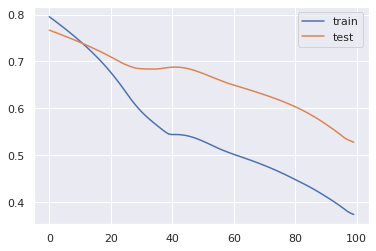

In [41]:
def modelling_2():
    modelling_2.model = keras.Sequential()
    modelling_2.model.add(keras.layers.LSTM(
      units=16,
      input_shape=(modelling_1.X_train.shape[1], modelling_1.X_train.shape[2])
    ))
    modelling_2.model.add(keras.layers.RepeatVector(n=modelling_1.X_train.shape[1]))
    modelling_2.model.add(keras.layers.LSTM(units=16, return_sequences=True))
    modelling_2.model.add(
    keras.layers.TimeDistributed(
      keras.layers.Dense(units=modelling_1.X_train.shape[2])
    )
    )

    modelling_2.model.compile(loss='mae', optimizer='adam')
    #model.fit(X_train, X_train, epochs=100, batch_size=6000, verbose=1, validation_data=(X_test, y_test))
    history = modelling_2.model.fit(
      modelling_1.X_train, modelling_1.X_train,
      epochs=100,
      batch_size=1024,
      validation_split=0.1,
      shuffle=False
    )
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
modelling_2()

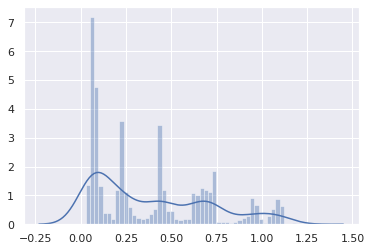

In [42]:
def modelling_3():
    modelling_3.X_train_pred = modelling_2.model.predict(modelling_1.X_train)
    modelling_3.train_mae_loss = np.mean(np.abs(modelling_3.X_train_pred - modelling_1.X_train), axis=1)
    sns.distplot(modelling_3.train_mae_loss, bins=50, kde=True);
modelling_3()

In [43]:
def modelling_4(threshold):  
    modelling_4.X_test_pred = modelling_2.model.predict(modelling_1.X_test)
    modelling_4.test_mae_loss = np.mean(np.abs(modelling_4.X_test_pred - modelling_1.X_test), axis=1)
    modelling_4.THRESHOLD = threshold

    modelling_4.test_score_df = pd.DataFrame(index=anomaly_detection.test[modelling_1.TIME_STEPS:].index)
    modelling_4.test_score_df['loss'] = modelling_4.test_mae_loss
    modelling_4.test_score_df['threshold'] = threshold
    modelling_4.test_score_df['anomaly'] = modelling_4.test_score_df.loss > modelling_4.test_score_df.threshold
    modelling_4.test_score_df['value'] = anomaly_detection.test[modelling_1.TIME_STEPS:].value
    plt.plot(modelling_4.test_score_df.index, modelling_4.test_score_df.loss, label='loss')
    plt.plot(modelling_4.test_score_df.index, modelling_4.test_score_df.threshold, label='threshold')
    plt.xticks(rotation=25)
    plt.legend();


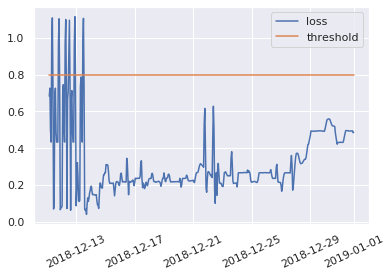

In [44]:
modelling_4(0.8)

In [47]:
def plot_anomaly(tag,TIME_STEPS):
    plot_anomaly.anomalies = modelling_4.test_score_df[modelling_4.test_score_df.anomaly == True]
    plt.plot(
    anomaly_detection.test[modelling_1.TIME_STEPS:].index, 
    modelling_1.scaler.inverse_transform(anomaly_detection.test[modelling_1.TIME_STEPS:].value), 
    label=tag
    );
    sns.scatterplot(
    plot_anomaly.anomalies.index,
    modelling_1.scaler.inverse_transform(plot_anomaly.anomalies.value),
    color=sns.color_palette()[3],
    s=52,
    label='anomaly'
    )
    plt.xticks(rotation=25)
    plt.legend()

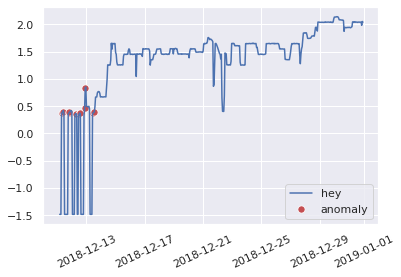

In [48]:
plot_anomaly('hey',modelling_1.TIME_STEPS)